# Kennedy Fletcher

## Research Question / Interests

### I want to look at the differentiation in point allocation throughout the years, as well as the variation in the numbers of drivers each year.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
import csv

In [68]:
f1data = pd.read_csv("../data/raw/f1data.csv")

## Milestone 3 Task 1 (EDA)

Checking how many rows and how many columns I will have to work with.

In [48]:
f1data.shape

(1573, 6)

Inspecting the column names

In [49]:
f1data.columns

Index(['Pos', 'Driver', 'Nationality', 'Car', 'PTS', 'Year'], dtype='object')

Here I will create a visualization for the points allocated per year.

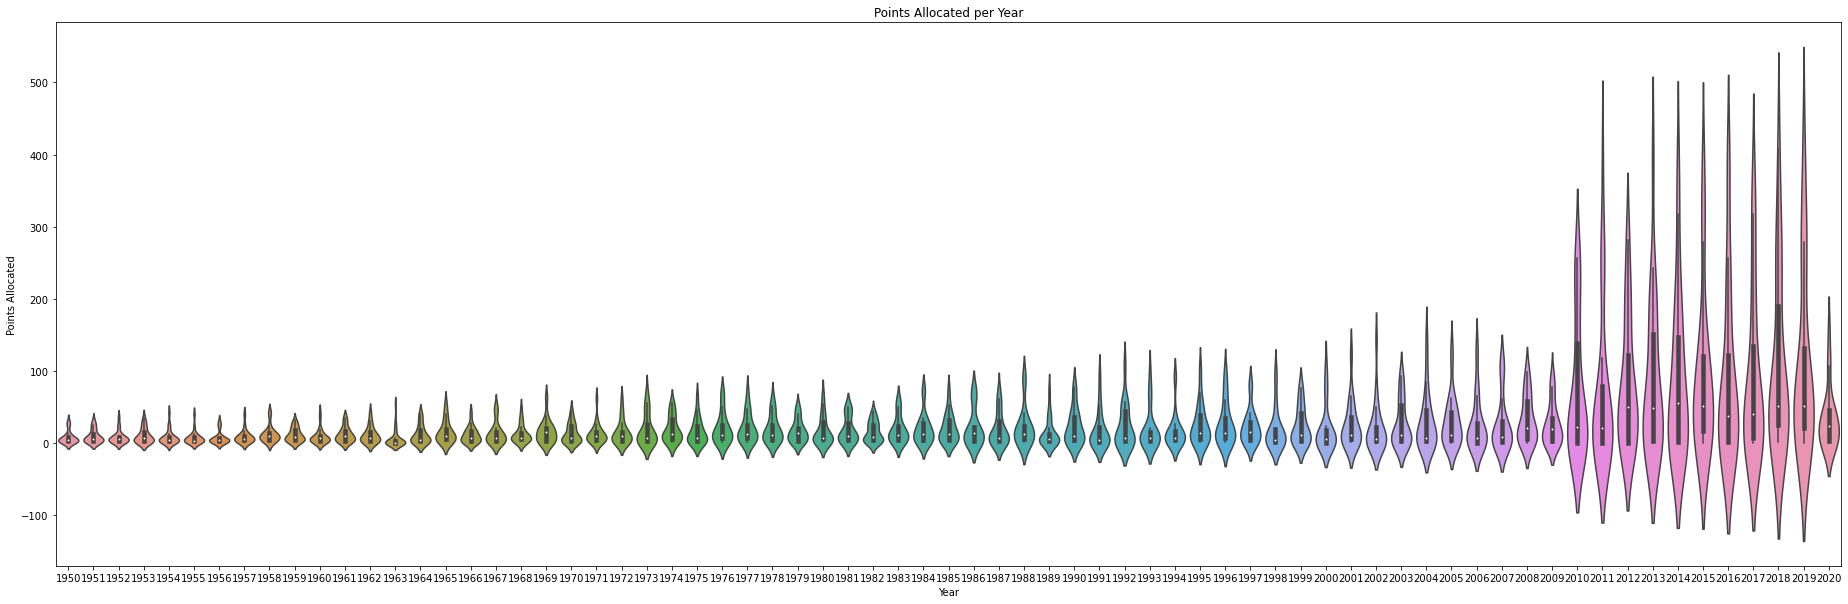

In [50]:
vplot_ppy = sns.violinplot(x="Year", y="PTS", scale = "width", data=f1data)
vplot_ppy.set(xlabel='Year', ylabel='Points Allocated', title = 'Points Allocated per Year')
vplot_ppy.figure.set_size_inches(32,10)

This visualisation shows a clear jump in point allocation in the year of 2010, where as up until then, there was a quite slow upward growing trend, implying that there is a larger number of points being given out per race in the years of 2010 and proceeding, than that prior to 2010.

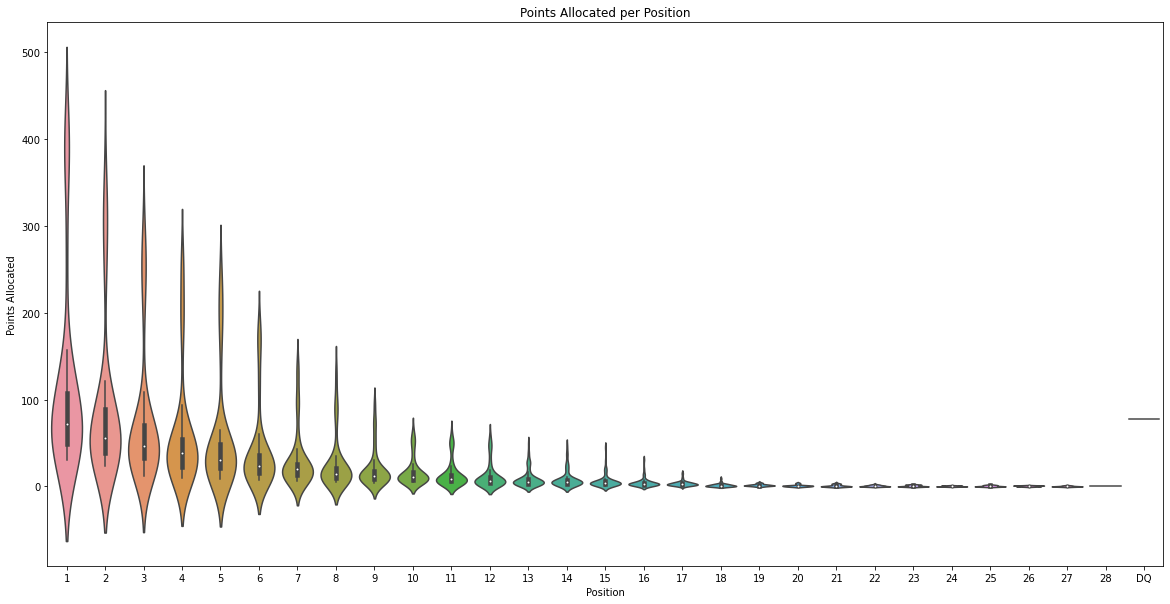

In [52]:
vplot_ppp = sns.violinplot(x="Pos", y="PTS", scale = "width", data=f1data,order=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','DQ'])
vplot_ppp.set(xlabel='Position', ylabel='Points Allocated', title = 'Points Allocated per Position')
vplot_ppp.figure.set_size_inches(20,10)

Something that I noticed when comparing the above visualization with the "Points Allocated Per Year" visualization is that in the violin plot for "Points Allocated Per Position", you can see almost two separate bubbles. The lower, more substantial bubble seems to correlate with the point allocation per year visualization, through the years of 1950 to 2009, where as the upper, skinnier bubble of the "Points Allocated Per Position" seems to correlate with the "Points Allocated Per Year" visualization for the years of 2010-2020. The comparison of these two visualizations allows us to come to the conclusion that there are indeed more points being allocated per position starting in the year of 2010.

I want to compare the number of drivers per year, but the dataset didn't allow to directly do that, so below, I will be creating a new dataframe that consists of two columns; "Year" and "Driver Count". I will clean the data copied from f1data, and only keep the first presence (remove duplicates) of each year and it's distinct driver count so that I am able to create a visualization of the distinct count of driveres per year.

In [55]:
data = f1data

data['Driver Count'] = data.groupby('Year')['Year'].transform('count')
data

data2 = [data["Year"], data["Driver Count"]]

headers = ["Year", "Driver Count"]

driver_count = pd.concat(data2, axis=1, keys=headers)
driver_count.drop_duplicates(subset ="Year", keep = "first", inplace = True)
driver_count = driver_count.reset_index()
driver_count = driver_count.drop(columns=["index"])

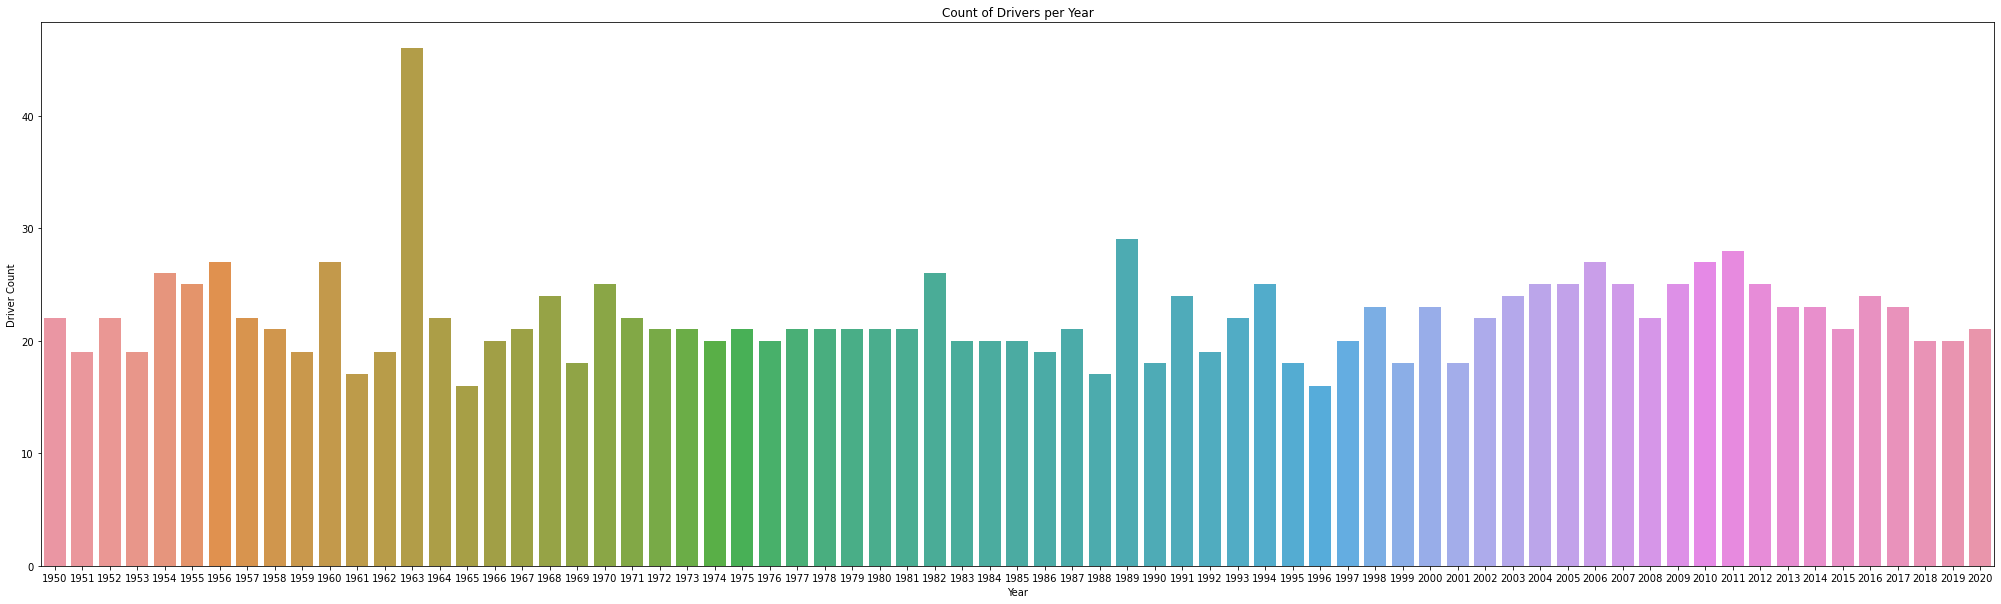

In [56]:
bar_dpy = sns.barplot(x="Year", y="Driver Count", data=driver_count)
bar_dpy.set(title = 'Count of Drivers per Year')
bar_dpy.figure.set_size_inches(35,10)

The above visualization clearly shows us that the distinct number of drivers per year (season) stayed relativedly the same over the 70 year history of F1. It appears that the average number of drivers sat around 25-30 per year. The clear outlier lays in the year of 1963, with almost 50 drivers. I speculate that there were a large number of alternate drivers that year, rather than sticking to a few main drivers for each team, which could be due to rebranding or rebuilding within the teams.

# Milestone 3 Task 2

Checking the delimiter

In [28]:
sniffer = csv.Sniffer()
dialect = sniffer.sniff("first, second, third, fourth")
print(dialect.delimiter)

,


Changing column names so that it is clear what is meant by Car and PTS

In [29]:
f1data.rename(columns={"Car":"Team","Pos":"Position","PTS":"Points"}, inplace=True)

Checking to make sure that there are no duplicate entries within f1data

In [61]:
if len(f1data[f1data.duplicated()]) > 0:
    print("Number of duplicated entries: ", len(f1data[f1data.duplicated()]))
    display(f1data[f1data.duplicated(keep=False)].sort_values(by=list(f1data.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


Checking for null values within the dataframe

In [30]:
f1data.isnull().any(axis=None)
print("Preview of data with null values:")
print(f1data[f1data.isnull().any(axis=1)])

Preview of data with null values:
    Position                  Driver Nationality Team  Points  Year
16        13     Dorino Serafini SER         ITA  NaN     3.0  1950
17        13  Philippe Etancelin ETA         FRA  NaN     3.0  1950
21        20      Eugene Chaboud CHA         FRA  NaN     1.0  1950
35        12        Louis Rosier ROS         FRA  NaN     3.0  1951
53        13         Ken Wharton WHA         GBR  NaN     3.0  1952
309       18      Masten Gregory GRE         USA  NaN     0.0  1963
314       18       Mike Hailwood HAI         GBR  NaN     0.0  1963
446       13     Richard Attwood ATT         GBR  NaN     3.0  1969
478        2     Ronnie Peterson PET         SWE  NaN    33.0  1971
492       16        Mark Donohue DON         USA  NaN     4.0  1971
493       16     Henri Pescarolo PES         FRA  NaN     4.0  1971


We can see above that there are missing team names for some of the drivers, and these are independent drivers, so below I will change anything with NaN to Independent.

In [34]:
f1data["Team"].fillna("Independent", inplace = True)

Fixing the spelling of Kimi's last name

In [36]:
f1data['Driver'] = f1data['Driver'].replace(['Kimi RÃ¤ikkÃ¶nen RAI'],'Kimi Räikkönen RAI')
i=f1data[f1data['Driver']=='Kimi Räikkönen RAI']

Here I wanted to separate the driver ID off of the Driver name to make the Driver column cleaner, then making it it's own column

In [40]:
f1data["Driver_ID"] = f1data["Driver"].str[-3:]
f1data["Driver2"] = f1data["Driver"].str[:-3]
f1data = f1data.drop(columns=["Driver"])
f1data.rename(columns={"Driver2": "Driver"}, inplace=True)
f1data = f1data[["Driver", "Driver_ID", "Team", "Nationality", "Points", "Position", "Year"]]

# Milestone 3 Task 3

In [66]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
          pd.read_csv(url_or_path_to_csv_file)
          .rename(columns={"Car":"Team","Pos":"Position","PTS":"Points"})
          .fillna("Independent")
          .replace(['Kimi RÃ¤ikkÃ¶nen RAI'],'Kimi Räikkönen RAI')
      )
    # Removing Driver ID
    df2 = (
        df1
        .assign(Driver_ID = df1["Driver"].str[-3:],Driver2 = df1["Driver"].str[:-3])
        .drop(columns=["Driver"])
        .rename(columns={"Driver2": "Driver"})
        [["Driver", "Driver_ID", "Team", "Nationality", "Points", "Position", "Year"]]
      )

    return df2


In [69]:
df2 = load_and_process("../data/raw/f1data.csv")

Here I am exporting the cleaned data for group tableau use.

In [70]:
df2.to_csv('cleanedf1data.csv')